In [2]:
# environment
import matplotlib.font_manager as fm
import numpy as np
import random as rand
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
import os 
import math as mt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
%matplotlib notebook

cwd = os.getcwd()
pwd = os.path.abspath(os.path.join(cwd, os.pardir))
fontloc = pwd + '/Fonts/SFMono-Regular.otf'
font = fm.FontProperties(fname = fontloc,size = 8); prop = font
proplr = fm.FontProperties(fname = fontloc,size = 12)

fontlocit = pwd + '/Fonts/SFMono-RegularItalic.otf'
fontit = fm.FontProperties(fname = fontlocit,size = 8)

#ticks font
def ticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)
        
def xticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
        
def yticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)

@ticker.FuncFormatter
def major_formatter(x, pos):
    label = str("{0:.1f}".format(x)) if x < 0 else str("{0:.2f}".format(x))
    return label

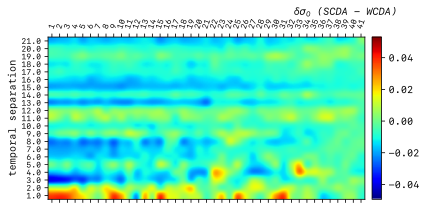

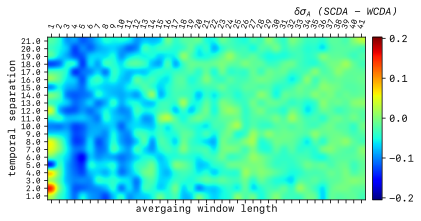

In [12]:
## Results 
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
%matplotlib inline

M   = ['S', 1.0, 21.0, 1.0]
Win = ['S',   1,   41,   1]         

OutO = np.loadtxt(pwd + '/ToyModel_1/Data/Ocean_14.log', delimiter=',');
OutA = np.loadtxt(pwd + '/ToyModel_1/Data/Atmos_14.log', delimiter=',');

#OutO = np.loadtxt(pwd + '/ToyModel_1/Data/Ocean_3_Non.log', delimiter=',');
#OutA = np.loadtxt(pwd + '/ToyModel_1/Data/Atmos_3_Non.log', delimiter=',');

def normalised_diff(data):
    min_data = min(map(min, data))
    max_data = max(map(max, data))
    norm_value = (2/(max_data - min_data))*(data - min_data) - 1
    return norm_value

if   Win[0] == 'S':
    seq_win = range(Win[1], Win[-2] + 1, Win[-1])
elif Win[0] == 'L':
    seq_win = Win[1:-1]
    
if   M[0] == 'S':
    seq = np.arange(M[1], M[-2] + 1, M[-1])
elif M[0] == 'L':
    seq = M[1:-1]

devO = np.std(OutO)
devA = np.std(OutA)

OutO_ = OutO
OutA_ = OutA

#OutO_ = normalised_diff(OutO)
#OutA_ = normalised_diff(OutA)

fig, ax = plt.subplots(figsize=(6,4), dpi=100);
im = ax.matshow(np.array(OutO_),origin='lower',interpolation='gaussian',cmap='jet');
#im = ax.matshow(np.array(OutO),origin='lower',cmap='jet');
ax.grid(which='minor')
ax.set_aspect(1.0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad = 0.1)
cb = plt.colorbar(im, cax=cax,orientation="vertical");
axc = cb.ax; text = axc.yaxis.label
text.set_font_properties(proplr)
ticks(axc,10); ticks(ax,8);
#ax.set_xlabel('averaging window length',fontproperties=font,fontsize=10); 
ax.set_xticks(range(len(seq_win)));
ax.set_xticklabels(seq_win);
plt.setp(ax.xaxis.get_majorticklabels(),rotation=70)
ax.set_ylabel('temporal separation',fontproperties=font,fontsize=10); 
ax.set_yticks(range(len(seq)));
ax.set_yticklabels(seq);
ax.set_title(r'$\mathregular{\delta}$' + r'$\sigma$' + r'$\mathregular{_O}$ (SCDA - WCDA)',fontproperties=fontit,fontsize=10,x=1.10,y=1.10,loc='right');
plt.savefig("/Users/asi066/Desktop/Fig7a.png",dpi=800)

fig, ax = plt.subplots(figsize=(6,4), dpi=100);
im = ax.matshow(np.array(OutA_),origin='lower',interpolation='gaussian',cmap='jet');
#im = ax.matshow(np.array(OutA),origin='lower',cmap='jet');
ax.grid(which='minor')
ax.set_aspect(1.0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad = 0.1)
cb = plt.colorbar(im, cax=cax,orientation="vertical");
axc = cb.ax; text = axc.yaxis.label
text.set_font_properties(proplr)
ticks(axc,10); ticks(ax,8);
ax.set_xlabel('avergaing window length',fontproperties=font,fontsize=10); 
ax.set_xticks(range(len(seq_win)));
ax.set_xticklabels(seq_win);
plt.setp(ax.xaxis.get_majorticklabels(),rotation=70)
ax.set_ylabel('temporal separation',fontproperties=font,fontsize=10); 
ax.set_yticks(range(len(seq)));
ax.set_yticklabels(seq);
ax.set_title(r'$\mathregular{\delta}$' + r'$\sigma$' + r'$\mathregular{_A}$ (SCDA - WCDA)',fontproperties=fontit,fontsize=10,x=1.10,y=1.10,loc='right');
plt.savefig("/Users/asi066/Desktop/Fig7b.png",dpi=800)